In [30]:
!pip install wordninja -q

In [31]:
import pandas as pd
import nltk
import ast
from collections import Counter
from matplotlib import pyplot as plt
import re
import wordninja
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
engg_jobs_topics_df = pd.read_csv('../data/engg_jobs_topics_df.csv')
engg_jobs_topics_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens,processed_tokens,Cybersecurity and Infrastructure Management,Employee Benefits and Compensation Programs,Equal Opportunity and Diversity,Quality Assurance and Manufacturing,"Data Science and Platform Development""",main_topic
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,"['The', 'TSUBAKI', 'name', 'is', 'synonymous',...","['TSUBAKI', 'name', 'synonymous', 'excellence'...","['tsubaki', 'name', 'synonym', 'excel', 'quali...","['TSUBAKI', 'name', 'synonymous', 'excellence'...","['\n', 'The', 'TSUBAKI', 'name', 'is', 'synony...","['TSUBAKI', 'synonymous', 'excellence', 'quali...","['tsubaki', 'synonymous', 'excellence', 'quali...",tsubaki synonymous excellence quality dependab...,0.001110,0.001106,0.081731,0.914934,0.001119,Quality Assurance and Manufacturing
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"['Head-huntress.com', 'has', 'a', 'Direct', 'H...","['Direct', 'Hire', 'opportunity', 'Controls', ...","['direct', 'hire', 'opportun', 'control', 'eng...","['Direct', 'Hire', 'opportunity', 'Controls', ...","['Head-huntress.com', 'has', 'a', 'Direct', 'H...","['Direct', 'Hire', 'opportunity', 'Controls', ...","['Direct', 'Hire', 'opportunity', 'Controls', ...",Direct Hire opportunity Controls Engineer repu...,0.092186,0.040493,0.001105,0.865135,0.001081,Quality Assurance and Manufacturing
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"['We', ""'re"", 'seeking', 'a', 'Lead', 'Electri...","['seeking', 'Lead', 'Electrical', 'Engineer', ...","['seek', 'lead', 'electr', 'engin', 'join', 'd...","['seeking', 'Lead', 'Electrical', 'Engineer', ...","['We', ""'re"", 'seeking', 'a', 'Lead', 'Electri...","['seeking', 'Lead', 'Electrical', 'Engineer', ...","['seek', 'Lead', 'Electrical', 'Engineer', 'jo...",seek Lead Electrical Engineer join dynamic tea...,0.178253,0.156140,0.002250,0.661088,0.002269,Quality Assurance and Manufacturing
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"['About', 'Us', ':', 'We', 'are', 'a', 'premie...","['Us', 'premier', 'organization', 'forefront',...","['us', 'premier', 'organ', 'forefront', 'milit...","['Us', 'premier', 'organization', 'forefront',...","['About', 'Us', ':', 'We', 'are', 'a', 'premie...","['premier', 'organization', 'forefront', 'cutt...","['premier', 'organization', 'forefront', 'cut'...",premier organization forefront cut edge milita...,0.354895,0.146937,0.003733,0.387981,0.106453,Quality Assurance and Manufacturing
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"['Join', 'a', 'premier', 'organization', 'at',...","['Join', 'premier', 'organization', 'forefront...","['join', 'premier', 'organ', 'forefront', 'mil...","['Join', 'premier', 'organization', 'forefront...","['Join', 'a', 'premier', 'organization', 'at',...","['Join', 'premier', 'organization', 'forefront...","['join', 'premier', 'organization', 'forefront...",join premier organization forefront cut edge m...,0.203979,0.097611,0.002781,0.692849,0.002780,Quality Assurance and Manufacturing


In [4]:
engg_jobs_topics_df['main_topic'].value_counts()

main_topic
Quality Assurance and Manufacturing            1112
Data Science and Platform Development"          568
Cybersecurity and Infrastructure Management     563
Equal Opportunity and Diversity                 548
Employee Benefits and Compensation Programs     471
Name: count, dtype: int64

In [6]:
data_science_platform_dev_df = engg_jobs_topics_df[engg_jobs_topics_df['main_topic'] == 'Data Science and Platform Development"']
data_science_platform_dev_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens,processed_tokens,Cybersecurity and Infrastructure Management,Employee Benefits and Compensation Programs,Equal Opportunity and Diversity,Quality Assurance and Manufacturing,"Data Science and Platform Development""",main_topic
18,3757915686,3608.0,Senior SRE Software Engineer - Block Storage,Site Reliability Engineering (SRE) Site Reliab...,"['Site', 'Reliability', 'Engineering', '(', 'S...","['Site', 'Reliability', 'Engineering', 'SRE', ...","['site', 'reliabl', 'engin', 'sre', 'site', 'r...","['Site', 'Reliability', 'Engineering', 'SRE', ...","['Site', 'Reliability', 'Engineering', '(', 'S...","['Site', 'Reliability', 'Engineering', 'SRE', ...","['site', 'Reliability', 'Engineering', 'SRE', ...",site Reliability Engineering SRE Site Reliabil...,0.106912,0.000910,0.199815,0.000910,0.691453,"Data Science and Platform Development"""
26,3757911572,3608.0,"Principal Software Engineer, MLOps Infrastructure",We are looking for a Principal Software Engine...,"['We', 'are', 'looking', 'for', 'a', 'Principa...","['looking', 'Principal', 'Software', 'Engineer...","['look', 'princip', 'softwar', 'engin', 'deep'...","['looking', 'Principal', 'Software', 'Engineer...","['We', 'are', 'looking', 'for', 'a', 'Principa...","['looking', 'Principal', 'Software', 'Engineer...","['look', 'Principal', 'Software', 'Engineer', ...",look Principal Software Engineer deep learn le...,0.000998,0.079597,0.210750,0.000981,0.707673,"Data Science and Platform Development"""
29,3757909418,2701.0,Data Foundation Engineering Leader – GRS Tech,Pay Philosophy\n\nThe typical starting salary ...,"['Pay', 'Philosophy', 'The', 'typical', 'start...","['Pay', 'Philosophy', 'typical', 'starting', '...","['pay', 'philosophi', 'typic', 'start', 'salar...","['Pay', 'Philosophy', 'typical', 'starting', '...","['Pay', 'Philosophy', '\n\n', 'The', 'typical'...","['Pay', 'Philosophy', 'typical', 'starting', '...","['pay', 'Philosophy', 'typical', 'start', 'sal...",pay Philosophy typical start salary range role...,0.000587,0.092764,0.200395,0.000587,0.705667,"Data Science and Platform Development"""
33,3757903602,79098.0,Data Warehouse Engineer,Are you ready to embark on an exciting journey...,"['Are', 'you', 'ready', 'to', 'embark', 'on', ...","['ready', 'embark', 'exciting', 'journey', 'ex...","['readi', 'embark', 'excit', 'journey', 'exper...","['ready', 'embark', 'exciting', 'journey', 'ex...","['Are', 'you', 'ready', 'to', 'embark', 'on', ...","['ready', 'embark', 'exciting', 'journey', 'ex...","['ready', 'embark', 'exciting', 'journey', 'ex...",ready embark exciting journey expertise datum ...,0.001588,0.001564,0.001562,0.001590,0.993696,"Data Science and Platform Development"""
38,3757788824,98795204.0,Machine Learning Engineer,Company DescriptionWe are a startup that provi...,"['Company', 'DescriptionWe', 'are', 'a', 'star...","['Company', 'DescriptionWe', 'startup', 'provi...","['compani', 'descriptionw', 'startup', 'provid...","['Company', 'DescriptionWe', 'startup', 'provi...","['Company', 'DescriptionWe', 'are', 'a', 'star...","['Company', 'DescriptionWe', 'startup', 'provi...","['company', 'DescriptionWe', 'startup', 'provi...",company DescriptionWe startup provide high qua...,0.003711,0.003689,0.003680,0.088945,0.899974,"Data Science and Platform Development"""


In [7]:
data_science_platform_dev_df.to_csv('../data/data_science_platform_dev_df.csv', index=False)

In [9]:
def string_to_list(string):
    try:
        # This will safely evaluate the string as a list
        return ast.literal_eval(string)
    except ValueError as e:
        return [] 

In [10]:
data_science_platform_dev_df.dtypes

job_id                                           int64
company_id                                     float64
title                                           object
description                                     object
tokens                                          object
tokens_no_stopwords                             object
stemmed_tokens                                  object
lemmatized_tokens                               object
spacy_tokens                                    object
spacy_tokens_no_stopwords                       object
spacy_lemmatized_tokens                         object
processed_tokens                                object
Cybersecurity and Infrastructure Management    float64
Employee Benefits and Compensation Programs    float64
Equal Opportunity and Diversity                float64
Quality Assurance and Manufacturing            float64
Data Science and Platform Development"         float64
main_topic                                      object
dtype: obj

In [14]:
data_science_platform_dev_df['spacy_lemmatized_tokens'] = data_science_platform_dev_df['spacy_lemmatized_tokens'].apply(string_to_list)
data_science_platform_dev_df['spacy_lemmatized_tokens'].head()

C:\Users\10\AppData\Local\Temp\ipykernel_32040\664267197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_science_platform_dev_df['spacy_lemmatized_tokens'] = data_science_platform_dev_df['spacy_lemmatized_tokens'].apply(string_to_list)


18    [site, Reliability, Engineering, SRE, Site, Re...
26    [look, Principal, Software, Engineer, deep, le...
29    [pay, Philosophy, typical, start, salary, rang...
33    [ready, embark, exciting, journey, expertise, ...
38    [company, DescriptionWe, startup, provide, hig...
Name: spacy_lemmatized_tokens, dtype: object

In [23]:
extracted_engg_terms_tools = []
with open('../data/extracted_engg_terms_tools_final.txt', 'r') as file:
    for line in file:
        extracted_engg_terms_tools.append(line.strip().lower())

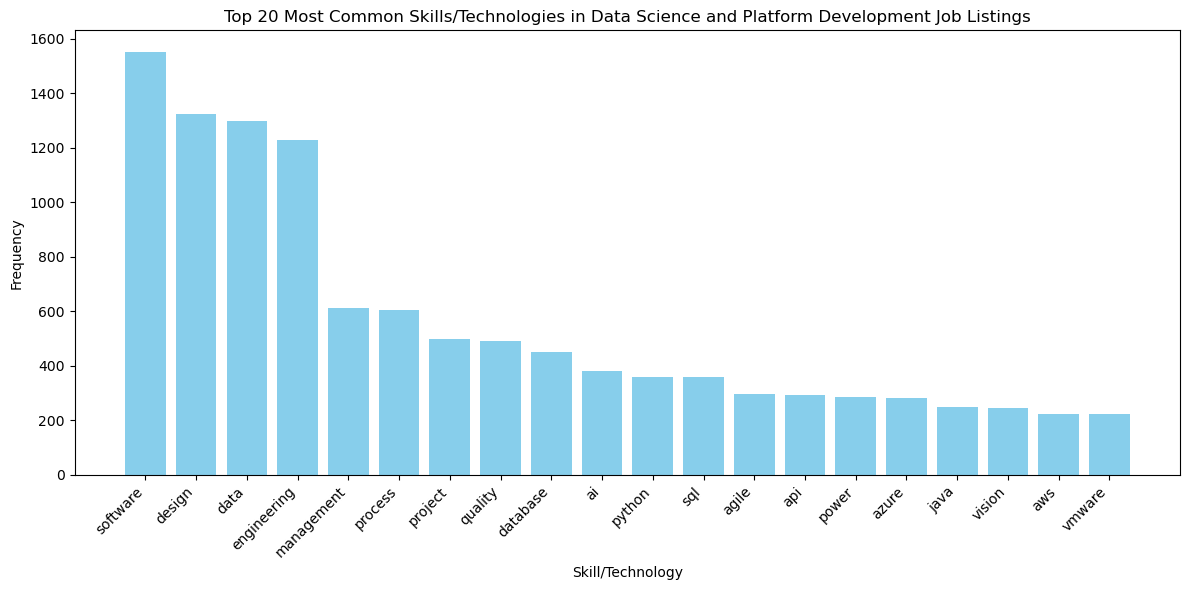

In [24]:
# skills_and_tech = [
#     'java', 'python', 'sql', 'aws', 'azure', 'docker', 'linux', 'git',
#     'junit', 'spring', 'kubernetes', 'api', 'rest', 'machine learning',
#     'data science', 'javascript', 'nodejs', 'react', 'angular', 'mongodb',
#     'postgreSQL', 'nosql', 'flask', 'django', 'tensorflow', 'pytorch', 'spark',
#     'hadoop', 'jira', 'scrum', 'agile', 'devops', 'ci/cd', 'jenkins', 'gitlab',
#     'selenium', 'unittest', 'maven', 'gradle', 'jupyter', 'pandas', 'numpy', 'scipy',
#     'sklearn', 'matplotlib', 'keras', 'nltk', 'spacy', 'opencv', 'scala', 'r', 'tableau',
#     'powerbi', 'sas', 'excel', 'qlik', 'big data', 'cloud', 'blockchain', 'ethereum',
#     'solidity', 'smart contracts', 'microservices', 'etl', 'redshift', 'snowflake',
#     'airflow', 'luigi', 'kafka', 'elasticsearch', 'cassandra', 'dynamodb', 'firebase',
#     'redis', 'oracle', 'mysql', 'sql server', 'db2', 'postgresql', 'sqlite', 'couchdb'
# ]

# Create a counter to store the frequencies of each skill/technology
skills_counter = Counter()

# Iterate over the lemmatized tokens and count the skills/technologies
for tokens in data_science_platform_dev_df['spacy_lemmatized_tokens']:
    for token in tokens:
        token = token.lower()  # Convert to lower case
        if token in extracted_engg_terms_tools:
            skills_counter[token] += 1

# Get the most common skills/technologies
most_common_skills = skills_counter.most_common(20)

# Generate a bar chart for the most common skills/technologies
skill_names = [skill for skill, freq in most_common_skills]
skill_freqs = [freq for skill, freq in most_common_skills]

plt.figure(figsize=(12, 6))
plt.bar(skill_names, skill_freqs, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Skill/Technology')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Skills/Technologies in Data Science and Platform Development Job Listings')
plt.tight_layout()  # Ensuring the layout fits the figure size
plt.show()

In [28]:

extracted_engg_terms_tools = set(term.lower() for term in extracted_engg_terms_tools)
compiled_extracted_engg_terms_tools = set([term.lower() for term in extracted_engg_terms_tools])
engg_terms_tools_pattern = {term: re.compile(f'^{term}') for term in compiled_extracted_engg_terms_tools}

def match_token(token):
    token_lower = token.lower()
    for pattern in engg_terms_tools_pattern.values():
        if pattern.match(token_lower):
            return True
    return False

def split_conjoined_non_engg_tokens(tokens):
    final_tokens = []
    for token in tokens:
        if not match_token(token):
            split_tokens = wordninja.split(token)
            final_tokens.extend(split_tokens)
        else:
            final_tokens.append(token)
    return final_tokens

In [32]:
data_science_platform_dev_df['tokens_no_conjoined'] = data_science_platform_dev_df['spacy_tokens_no_stopwords'].apply(
    split_conjoined_non_engg_tokens)

C:\Users\10\AppData\Local\Temp\ipykernel_32040\3147799013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_science_platform_dev_df['tokens_no_conjoined'] = data_science_platform_dev_df['spacy_tokens_no_stopwords'].apply(


In [42]:
data_science_platform_dev_df['spacy_tokens_no_stopwords']

18      ['Site', 'Reliability', 'Engineering', 'SRE', ...
26      ['looking', 'Principal', 'Software', 'Engineer...
29      ['Pay', 'Philosophy', 'typical', 'starting', '...
33      ['ready', 'embark', 'exciting', 'journey', 'ex...
38      ['Company', 'DescriptionWe', 'startup', 'provi...
                              ...                        
3233    ['Combine', 'technical', 'expertise', 'problem...
3238    ['Need', 'Genuine', 'candidates', 'solid', 'ex...
3245    ['Job', 'Description', 'Design', 'develop', 'l...
3256    ['Founded', 'Gatik', 'leader', 'autonomous', '...
3257    ['Step', 'realm', 'innovation', 'merges', 'sea...
Name: spacy_tokens_no_stopwords, Length: 568, dtype: object

In [41]:
data_science_platform_dev_df['tokens_no_conjoined']

18      [', S, i, t, e, ', ', R, e, l, i, a, b, i, l, ...
26      [', l, o, o, k, i, n, g, ', ', P, r, i, n, c, ...
29      [', P, a, y, ', ', P, h, i, l, o, s, o, p, h, ...
33      [', r, e, a, d, y, ', ', e, m, b, a, r, k, ', ...
38      [', C, o, m, p, a, n, y, ', ', D, e, s, c, r, ...
                              ...                        
3233    [', C, o, m, b, i, n, e, ', ', t, e, c, h, n, ...
3238    [', N, e, e, d, ', ', G, e, n, u, i, n, e, ', ...
3245    [', J, o, b, ', ', D, e, s, c, r, i, p, t, i, ...
3256    [', F, o, u, n, d, e, d, ', ', G, a, t, i, k, ...
3257    [', S, t, e, p, ', ', r, e, a, l, m, ', ', i, ...
Name: tokens_no_conjoined, Length: 568, dtype: object

In [34]:
import spacy
nlp = spacy.load('en_core_web_sm')
def spacy_lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

# Apply lemmatization
data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined'] = data_science_platform_dev_df['tokens_no_conjoined'].apply(spacy_lemmatize_tokens)
data_science_platform_dev_df.head()

C:\Users\10\AppData\Local\Temp\ipykernel_32040\1295275851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined'] = data_science_platform_dev_df['tokens_no_conjoined'].apply(spacy_lemmatize_tokens)


,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens,processed_tokens,Cybersecurity and Infrastructure Management,Employee Benefits and Compensation Programs,Equal Opportunity and Diversity,Quality Assurance and Manufacturing,"Data Science and Platform Development""",main_topic,tokens_no_conjoined,spacy_lemmatized_tokens_no_conjoined
18,3757915686,3608.0,Senior SRE Software Engineer - Block Storage,Site Reliability Engineering (SRE) Site Reliab...,"['Site', 'Reliability', 'Engineering', '(', 'S...","['Site', 'Reliability', 'Engineering', 'SRE', ...","['site', 'reliabl', 'engin', 'sre', 'site', 'r...","['Site', 'Reliability', 'Engineering', 'SRE', ...","['Site', 'Reliability', 'Engineering', '(', 'S...","['Site', 'Reliability', 'Engineering', 'SRE', ...","[site, Reliability, Engineering, SRE, Site, Re...",site Reliability Engineering SRE Site Reliabil...,0.106912,0.000910,0.199815,0.000910,0.691453,"Data Science and Platform Development""","[', S, i, t, e, ', ', R, e, l, i, a, b, i, l, ...","[', S, I, t, e, ', ', r, e, l, I, a, b, I, l, ..."
26,3757911572,3608.0,"Principal Software Engineer, MLOps Infrastructure",We are looking for a Principal Software Engine...,"['We', 'are', 'looking', 'for', 'a', 'Principa...","['looking', 'Principal', 'Software', 'Engineer...","['look', 'princip', 'softwar', 'engin', 'deep'...","['looking', 'Principal', 'Software', 'Engineer...","['We', 'are', 'looking', 'for', 'a', 'Principa...","['looking', 'Principal', 'Software', 'Engineer...","[look, Principal, Software, Engineer, deep, le...",look Principal Software Engineer deep learn le...,0.000998,0.079597,0.210750,0.000981,0.707673,"Data Science and Platform Development""","[', l, o, o, k, i, n, g, ', ', P, r, i, n, c, ...","[', l, o, o, k, I, n, g, ', ', p, r, I, n, c, ..."
29,3757909418,2701.0,Data Foundation Engineering Leader – GRS Tech,Pay Philosophy\n\nThe typical starting salary ...,"['Pay', 'Philosophy', 'The', 'typical', 'start...","['Pay', 'Philosophy', 'typical', 'starting', '...","['pay', 'philosophi', 'typic', 'start', 'salar...","['Pay', 'Philosophy', 'typical', 'starting', '...","['Pay', 'Philosophy', '\n\n', 'The', 'typical'...","['Pay', 'Philosophy', 'typical', 'starting', '...","[pay, Philosophy, typical, start, salary, rang...",pay Philosophy typical start salary range role...,0.000587,0.092764,0.200395,0.000587,0.705667,"Data Science and Platform Development""","[', P, a, y, ', ', P, h, i, l, o, s, o, p, h, ...","[', p, a, y, ', ', p, h, I, l, o, s, o, p, h, ..."
33,3757903602,79098.0,Data Warehouse Engineer,Are you ready to embark on an exciting journey...,"['Are', 'you', 'ready', 'to', 'embark', 'on', ...","['ready', 'embark', 'exciting', 'journey', 'ex...","['readi', 'embark', 'excit', 'journey', 'exper...","['ready', 'embark', 'exciting', 'journey', 'ex...","['Are', 'you', 'ready', 'to', 'embark', 'on', ...","['ready', 'embark', 'exciting', 'journey', 'ex...","[ready, embark, exciting, journey, expertise, ...",ready embark exciting journey expertise datum ...,0.001588,0.001564,0.001562,0.001590,0.993696,"Data Science and Platform Development""","[', r, e, a, d, y, ', ', e, m, b, a, r, k, ', ...","[', r, e, a, d, y, ', ', e, m, b, a, r, k, ', ..."
38,3757788824,98795204.0,Machine Learning Engineer,Company DescriptionWe are a startup that provi...,"['Company', 'DescriptionWe', 'are', 'a', 'star...","['Company', 'DescriptionWe', 'startup', 'provi...","['compani', 'descriptionw', 'startup', 'provid...","['Company', 'DescriptionWe', 'startup', 'provi...","['Company', 'DescriptionWe', 'are', 'a', 'star...","['Company', 'DescriptionWe', 'startup', 'provi...","[company, DescriptionWe, startup, provide, hig...",company DescriptionWe startup provide high qua...,0.003711,0.003689,0.003680,0.088945,0.899974,"Data Science and Platform Development""","[', C, o, m, p, a, n, y, ', ', D, e, s, c, r, ...","[', C, o, m, p, a, n, y, ', ',

In [40]:
data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined']

18      [', S, I, t, e, ', ', r, e, l, I, a, b, I, l, ...
26      [', l, o, o, k, I, n, g, ', ', p, r, I, n, c, ...
29      [', p, a, y, ', ', p, h, I, l, o, s, o, p, h, ...
33      [', r, e, a, d, y, ', ', e, m, b, a, r, k, ', ...
38      [', C, o, m, p, a, n, y, ', ', d, e, s, c, r, ...
                              ...                        
3233    [', C, o, m, b, I, n, e, ', ', t, e, c, h, n, ...
3238    [', N, e, e, d, ', ', G, e, n, u, I, n, e, ', ...
3245    [', J, o, b, ', ', d, e, s, c, r, I, p, t, I, ...
3256    [', F, o, u, n, d, e, d, ', ', g, a, t, I, k, ...
3257    [', S, t, e, p, ', ', r, e, a, l, m, ', ', I, ...
Name: spacy_lemmatized_tokens_no_conjoined, Length: 568, dtype: object

In [37]:
def remove_one_letters(tokens):
    return [token for token in tokens if len(token) > 1]

data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined_1letter'] = data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined'].apply(
    remove_one_letters)

C:\Users\10\AppData\Local\Temp\ipykernel_32040\2070980421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined_1letter'] = data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined'].apply(


In [39]:
data_science_platform_dev_df['spacy_lemmatized_tokens_no_conjoined_1letter']

18      []
26      []
29      []
33      []
38      []
        ..
3233    []
3238    []
3245    []
3256    []
3257    []
Name: spacy_lemmatized_tokens_no_conjoined_1letter, Length: 568, dtype: object

In [43]:
data_science_platform_dev_df.to_csv('../data/data_science_platform_dev_df.csv', index=False)

In [45]:
data_science_platform_dev_df['spacy_lemmatized_tokens']

18      [site, Reliability, Engineering, SRE, Site, Re...
26      [look, Principal, Software, Engineer, deep, le...
29      [pay, Philosophy, typical, start, salary, rang...
33      [ready, embark, exciting, journey, expertise, ...
38      [company, DescriptionWe, startup, provide, hig...
                              ...                        
3233    [combine, technical, expertise, problem, solve...
3238    [need, genuine, candidate, solid, experience, ...
3245    [Job, Description, Design, develop, launch, ex...
3256    [Founded, Gatik, leader, autonomous, middle, m...
3257    [step, realm, innovation, merge, seamlessly, t...
Name: spacy_lemmatized_tokens, Length: 568, dtype: object

In [52]:
data_science_platform_dev_df[data_science_platform_dev_df['job_id'] == 3694118823].iloc[0]['description']

'We have an exciting and rewarding opportunity for you to take your software engineering career to the next level.\nAs a Software Engineer III at JPMorgan Chase within CIB, PAYMENTS TECHNOLOGY, you serve as a seasoned member of an agile team to design and deliver trusted market-leading technology products in a secure, stable, and scalable way. You are responsible for carrying out critical technology solutions across multiple technical areas within various business functions in support of the firm\'s business objectives.\nJob Responsibilities\nExecutes software solutions, design, development, and technical troubleshooting with ability to think beyond routine or conventional approaches to build solutions or break down technical problemsCreates secure and high-quality production code and maintains algorithms that run synchronously with appropriate systemsProduces architecture and design artifacts for complex applications while being accountable for ensuring design constraints are met by s